## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.


<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [215]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [216]:
df= pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [217]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [218]:
len(df.user_id.unique())

290584

d. The proportion of users converted.

In [219]:
df[df['converted']==1]['converted'].count()/df['converted'].count()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [220]:
df.query("(group == 'treatment' & landing_page != 'new_page') or (group == 'control' & landing_page != 'old_page')").count()[0]  

3893

f. Do any of the rows have missing values?

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [222]:
df2 = df[(df.group == 'treatment') & (df.landing_page == 'new_page')]
df2 = df2.append(df[(df.group == 'control') & (df.landing_page == 'old_page')])

In [223]:
df2.shape[0]

290585

In [224]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [225]:
len(df2.user_id.unique())

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [226]:
dup= df2[df2.user_id.duplicated()]
print(dup)

      user_id                   timestamp      group landing_page  converted
2893   773192  2017-01-14 02:55:59.590927  treatment     new_page          0


c. What is the row information for the repeat **user_id**? 

In [227]:
dup

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [228]:
df2.drop(df.index[2893], axis=0, inplace=True)

In [229]:
df2.head()

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [230]:
# check if any duplicated user id
dup2= df2[df2.user_id.duplicated()]
print(dup2)

Empty DataFrame
Columns: [user_id, timestamp, group, landing_page, converted]
Index: []


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [231]:
df2[df2['converted']==1]['converted'].count()/df2['converted'].count()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [232]:
df2.query("converted=='1' & group =='control'")['converted'].count()/df2.query("group =='control'")['converted'].count()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [233]:
df2.query("converted=='1' & group =='treatment'")['converted'].count()/df2.query("group =='treatment'")['converted'].count()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [234]:
df2.query("landing_page=='new_page'")['converted'].count()/df2['converted'].count()

0.50006194422266881

In [235]:
df2.query("landing_page=='old_page'")['converted'].count()/df2['converted'].count()

0.49993805577733119

e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

**No,
because the diffrence in the two converstion rates are not profound**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

H0: **$p_{new}$** <= **$p_{old}$**
H2: **$p_{new}$** > **$p_{old}$**

**which are the converted rates for the old and new pages? 0.5 and 0.5**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [236]:
p_new= df2['converted'].mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [237]:
p_old = df2['converted'].mean()
p_old

0.11959708724499628

c. What is $n_{new}$?

In [238]:
n_new= df2[df2['landing_page']=='new_page'].count()[0]
n_new

145310

d. What is $n_{old}$?

In [239]:
n_old= df2[df2['landing_page']=='old_page'].count()[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [240]:
new_page_converted = np.random.binomial(n_new, p_new)

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [241]:
old_page_converted = np.random.binomial(n_old, p_old)

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [242]:
p_new-p_old

0.0

In [243]:
obs_diff = (new_page_converted/n_new)-(old_page_converted/n_old)
obs_diff

0.00073428396972004262

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [244]:
p_diffs = []
for _ in range(10000):
    new_page_converted= np.random.binomial(n_new, p_new)
    old_page_converted= np.random.binomial(n_old, p_old)
    p_diffs.append((new_page_converted/n_new) - (old_page_converted/n_old))

Convert the above array to numpy array

In [245]:
p_diffs= np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

Does this plot look like what you expected? 
yes it's normally distributed 

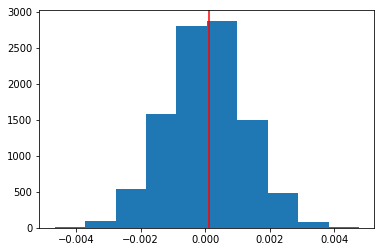

In [246]:
plt.hist(p_diffs)
plt.axvline(x=obs_difs, color="r");
plt.show()

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [247]:
# Compute actual differnce 
actual_diff=  df2.query('group == "treatment"')['converted'].mean() - df2.query('group == "control"')['converted'].mean()
# Compute p-value
x=  (p_diffs > actual_diff).mean()
x

0.90429999999999999

k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**It's called p-value**


**Fail to reject the null hypothesis because p_value is greater than the alpha 0.9 > 0.5**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [248]:
import statsmodels.api as sm

In [249]:
convert_old = df2.query('group == "control"')['converted'].sum()
convert_new = df2.query('group == "treatment"')['converted'].sum()

In [250]:
n_old = df2.query('landing_page == "old_page"').count()[0]
n_new = df2.query('landing_page == "new_page"').count()[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [251]:
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new,n_old])
print(z_score, p_value)

-1.31092419842 0.189883374482


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**yes they agree with the findings in parts j and k.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**logistic regression.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a colun for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [252]:
df2[['treatment', 'control']]= pd.get_dummies(df2['group'])
df2['ab_page'] = df2['treatment']

In [253]:
df2['intercept']= 1

In [254]:
df2.head(2)

,user_id,timestamp,group,landing_page,converted,treatment,control,ab_page,intercept
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,0,1,0,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [255]:
log_reg = sm.Logit( df2['converted'],df2[['intercept', 'ab_page']])
results = log_reg.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [256]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Fri, 21 Dec 2018   Pseudo R-squ.:               8.077e-06
Time:                        21:21:51   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0038      0.008   -247.146      0.000      -2.020      -1.988
ab_page        0.0150      0.011      1.311      0.190      -0.007       0.037
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

What is the p-value associated with ab_page?**0.190**

 
What are the null and alternative hypotheses associated with your regression model?

&emsp;&ensp;|&emsp;&emsp;**Part II&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;|&emsp;Part III<br>   
H0 | new_page-old_page<=0 | new_page= old_page<br>
H1 | new_page-old_page>0 | new_page!=old_page**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

Discuss why it is a good idea to consider other factors to add into your regression model?</b>
**The landing page is not statistically significant to predicting if the user will converts or not because the p_value of ab_page is 0.19 > 0.05 (type 1 error rate)**


</b>Are there any disadvantages to adding additional terms into your regression model?

</b>Disadvantage:
**The predictive power of regressor first increases as number of dimensions/features used is increased but then decreases, which is known as Hughes phenomenon or peaking phenomena.** https://en.wikipedia.org/wiki/Curse_of_dimensionality
 

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [257]:
co_df= pd.read_csv('countries.csv')
co_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [258]:
df3 = co_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df3.head()

,country,timestamp,group,landing_page,converted,treatment,control,ab_page,intercept
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,0,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,0,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,0,1,0,1


In [259]:
df3[['US', 'UK', 'CA']] = pd.get_dummies(df3['country'])

In [260]:
log_reg2 = sm.Logit(df3['converted'], df3[['intercept', 'US' , 'CA']])
results = log_reg2.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Fri, 21 Dec 2018   Pseudo R-squ.:               1.521e-05
Time:                        21:21:52   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9868      0.011   -174.174      0.000      -2.009      -1.964
US            -0.0507      0.028     -1.786      0.074      -0.106       0.005
CA            -0.0099      0.013     -0.746      0.456      -0.036       0.016
==============================================================================
"""

**The p_value > 0.05 (Type 1 error rate)** so the country also not has significant impact on the user conversion.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [261]:
df3['CA_page'] = df3['CA'] * df3['ab_page']
df3['UK_page'] = df3['UK'] * df3['ab_page']
df3.head()

,country,timestamp,group,landing_page,converted,treatment,control,ab_page,intercept,US,UK,CA,CA_page,UK_page
user_id,,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,1,0,1,0,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,0,1,0,1,0,0,1,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,0,1,0,1,0,1,0,0,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,1,0,1,0,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,0,1,0,1,0,1,0,0,0


In [262]:
df3['CA_page'].mean() , df3['UK_page'].mean()

(0.35003991961016434, 0.12512732979104149)

In [263]:
log_reg3= sm.Logit(df3['converted'], df3[['intercept', 'ab_page', 'US', 'CA']])
results=  log_reg3.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Fri, 21 Dec 2018   Pseudo R-squ.:               2.323e-05
Time:                        21:21:52   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9943      0.013   -156.012      0.000      -2.019      -1.969
ab_page        0.0149      0.011      1.307      0.191      -0.007       0.037
US            -0.0506      0.028     -1.784      0.074      -0.106       0.005
CA            -0.0099      0.013     -0.743      0.457      -0.036       0.016
==============================================================================
"""

 **a) What is your recommendation to the company - should they implement the new page?** no, they should keep the old page
 
 **b) What about for users from different countries?** we should gather more data about other users from different countries then repeat the process

**All of the p-values > 0.05 that's mean there is no impact on the user conversion by the country and landing page together**

In [264]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0